In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(file_path):
    """
    Reads a text file with training logs, extracts the epoch, loss, and accuracy,
    and returns a DataFrame without the last line.
    """
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[:-1]  # Read all lines and ignore the last one

    for line in lines:
        parts = line.split(',')
        epoch = int(parts[0].split(':')[1].strip())
        loss = float(parts[1].split(':')[1].strip())
        test_acc = float(parts[2].split(':')[1].strip())
        data.append([epoch, loss, test_acc])
    
    df = pd.DataFrame(data, columns=['Epoch', 'Loss', 'Test Acc'])
    return df

def plot_data(df):
    """
    Plots the loss and test accuracy from the DataFrame on the same plot with two y-axes.
    """
    fig, ax1 = plt.subplots()

    # Plotting loss
    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(df['Epoch'], df['Loss'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a second y-axis for test accuracy
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Test Acc', color=color)
    ax2.plot(df['Epoch'], df['Test Acc'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Final touches
    fig.tight_layout()  
    plt.title('Training Loss and Validation Accuracy per Epoch')
    plt.show()




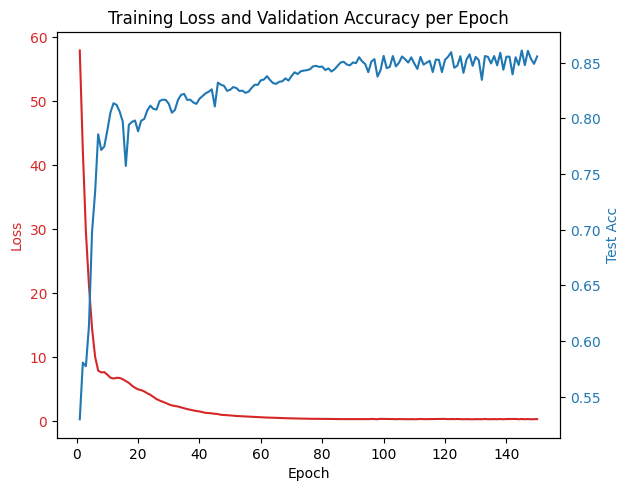

In [2]:
# Example usage
model = 'SAGE'
nu = 8
nu2 = 280935
file_path = f'group2/{model}_MIMIC_{nu}_1_2_150_output_{nu2}.txt'  # Modify this path to your actual file location
df = read_data(file_path)
plot_data(df)

In [6]:
def calculate_splits(total_samples, train_percent):
    """
    Calculate the number of samples for training, validation, and testing based on a given split percentage.
    
    Parameters:
        total_samples (int): Total number of samples in the dataset.
        train_percent (float): Percentage of the dataset to be used for training expressed as a float (e.g., 0.70 for 70%).

    Returns:
        tuple: A tuple containing the number of samples for training, validation, and testing datasets.
    """
    # Calculate number of training samples
    train_count = int(total_samples * train_percent)

    # Remaining samples for validation and testing
    remaining_samples = total_samples - train_count

    # Calculate validation and test counts based on remaining samples
    # Assuming the validation and test splits are 10% and 20% respectively of the total dataset
    # Calculate remaining percentages relative to the whole
    val_percent = 10 / (10 + 20)  # 10% of the total, but 33.33% of the remaining
    test_percent = 20 / (10 + 20)  # 20% of the total, but 66.67% of the remaining

    val_count = int(remaining_samples * val_percent)
    test_count = remaining_samples - val_count  # This ensures no rounding issues affect the total count

    return (train_count, val_count, test_count)

# Example usage
total_samples = 100
train_percent = 0.6
train, val, test = calculate_splits(total_samples, train_percent)
print(f"Train: {train} samples, Validation: {val} samples, Test: {test} samples")


Train: 60 samples, Validation: 13 samples, Test: 27 samples
